In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sb

In [84]:
df=pd.read_csv(r"C:\Users\ROHIT\Downloads\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
df[df['Age'].isnull()].count()

PassengerId    177
Survived       177
Pclass         177
Name           177
gender         177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64

In [90]:
df.gender.value_counts()

gender
male      577
female    314
Name: count, dtype: int64

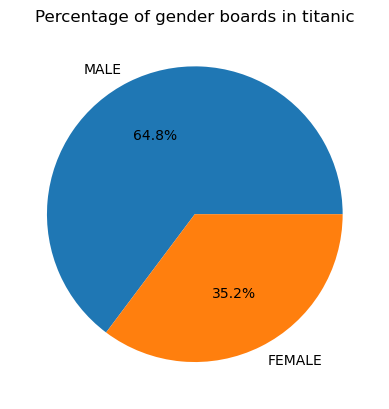

In [91]:
plt.pie([577,314],labels=['MALE','FEMALE'],autopct='%.1f%%')
plt.title('Percentage of gender boards in titanic')
plt.show()

Male and female pecentage of board on titanic

In [92]:
 df[df.Survived==1].groupby(by='gender').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
gender,,,,,,,,,,,
female,233,233,233,233,197,233,233,233,233,91,231
male,109,109,109,109,93,109,109,109,109,45,109


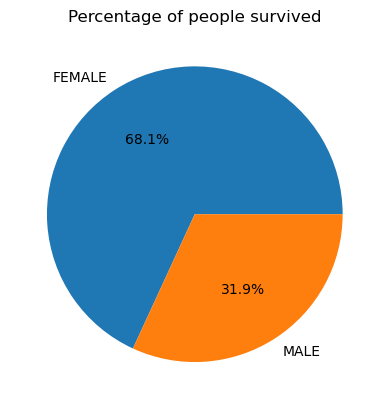

In [93]:
plt.pie([233,109],labels=['FEMALE','MALE'],autopct='%.1f%%')
plt.title('Percentage of people survived')
plt.show()

More females survived than mens

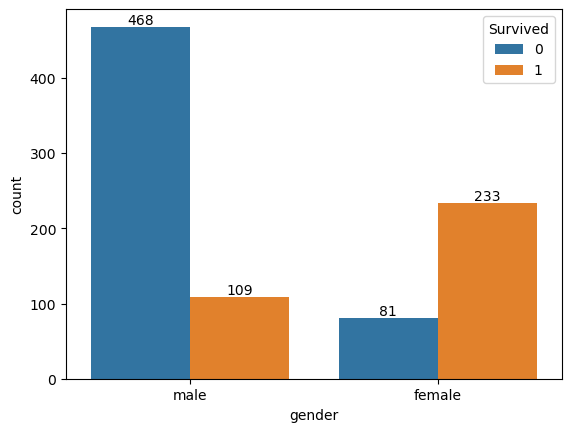

In [94]:
ax=sb.countplot(x='gender',data=df,hue='Survived')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [95]:
df.groupby(by=['Survived','gender']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived gender                                                               
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived gender                   
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

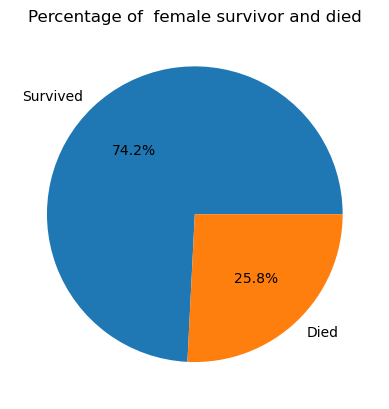

In [96]:
plt.pie([233,81],labels=['Survived','Died'],autopct='%.1F%%')
plt.title('Percentage of  female survivor and died')
plt.show()

In [97]:
df[(df.gender=='female')&(df.Survived==1)].groupby(by='Pclass')['Survived'].count()

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

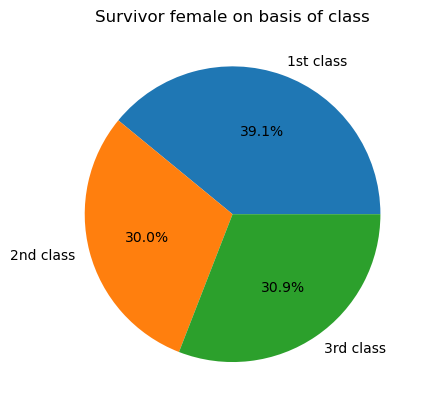

In [98]:
plt.pie([91,70,72],labels=['1st class','2nd class','3rd class'],autopct='%.1f%%')
plt.title('Survivor female on basis of class')
plt.show()

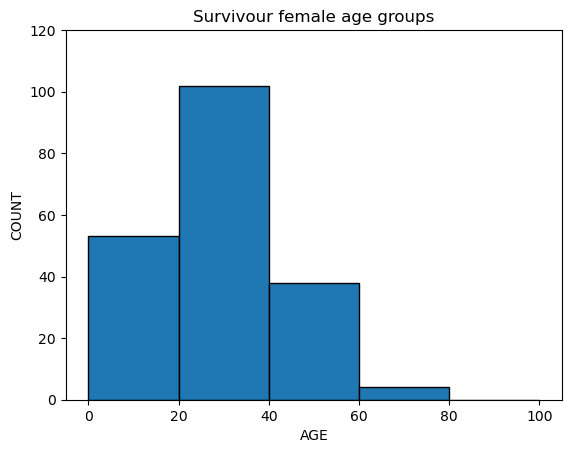

In [99]:
f_s=df[(df.gender=='female')&(df.Survived==1)]

plt.hist(f_s['Age'],bins=[0,20,40,60,80,100],edgecolor='k')
plt.xlabel("AGE")
plt.yticks([0,20,40,60,80,100,120])
plt.ylabel('COUNT')
plt.title('Survivour female age groups')
plt.show()

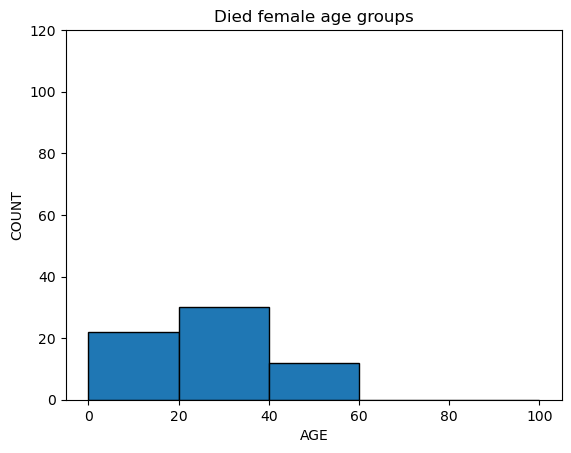

In [100]:
f_s=df[(df.gender=='female')&(df.Survived==0)]

plt.hist(f_s['Age'],bins=[0,20,40,60,80,100],edgecolor='k')
plt.xlabel("AGE")
plt.yticks([0,20,40,60,80,100,120])
plt.ylabel('COUNT')
plt.title('Died female age groups')
plt.show()

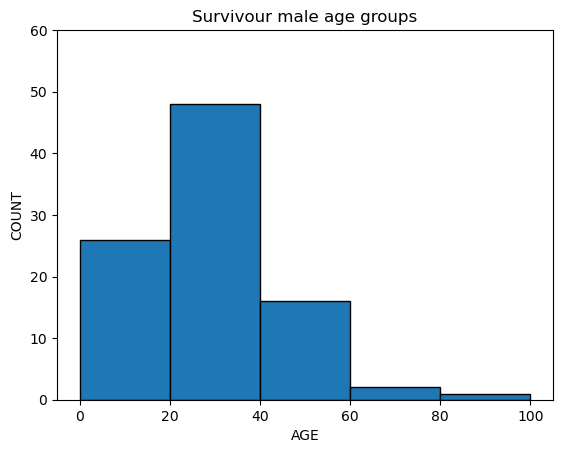

In [101]:
f_s=df[(df.gender=='male')&(df.Survived==1)]

plt.hist(f_s['Age'],bins=[0,20,40,60,80,100],edgecolor='k')
plt.yticks([0,10,20,30,40,50,60])
plt.xlabel("AGE")
plt.ylabel('COUNT')
plt.title('Survivour male age groups')
plt.show()

In [102]:
df[(df.gender=='male')&(df.Survived==1)&(df.Age>40)].shape

(18, 12)

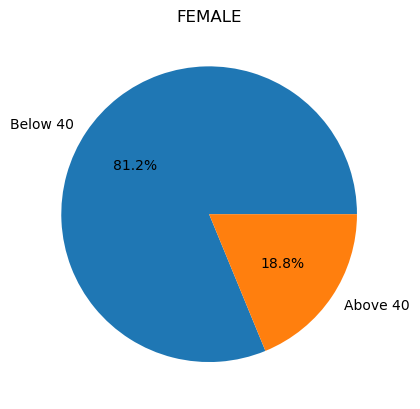

In [103]:
plt.pie([160,37],labels=['Below 40','Above 40'],autopct='%.1f%%')
plt.title('FEMALE')
plt.show()

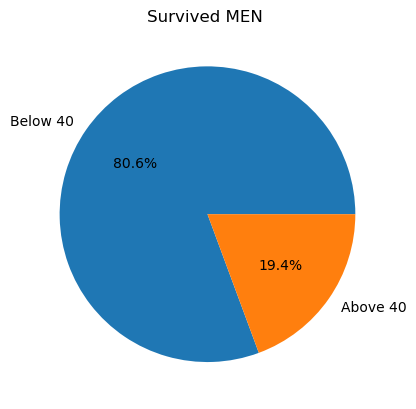

In [104]:
plt.pie([75,18],labels=['Below 40','Above 40'],autopct='%.1f%%')
plt.title('Survived MEN ')
plt.show()

In [105]:
df[df['gender']=='male'].groupby(by='Survived').count()

,PassengerId,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,468,468,468,468,360,468,468,468,468,62,468
1,109,109,109,109,93,109,109,109,109,45,109


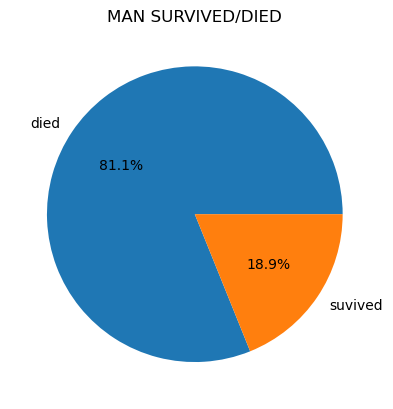

In [106]:
plt.pie([468,109],labels=['died','suvived'],autopct='%.1f%%')
plt.title('MAN SURVIVED/DIED')
plt.show()

In [107]:
df[df['gender']=='female'].groupby(by='Survived').count()

,PassengerId,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,81,81,81,81,64,81,81,81,81,6,81
1,233,233,233,233,197,233,233,233,233,91,231


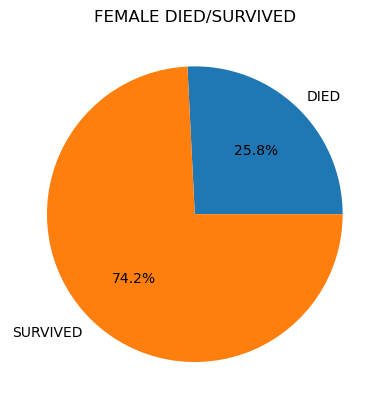

In [108]:
plt.pie([81,233],labels=['DIED','SURVIVED'],autopct='%.1f%%')
plt.title('FEMALE DIED/SURVIVED')
plt.show()

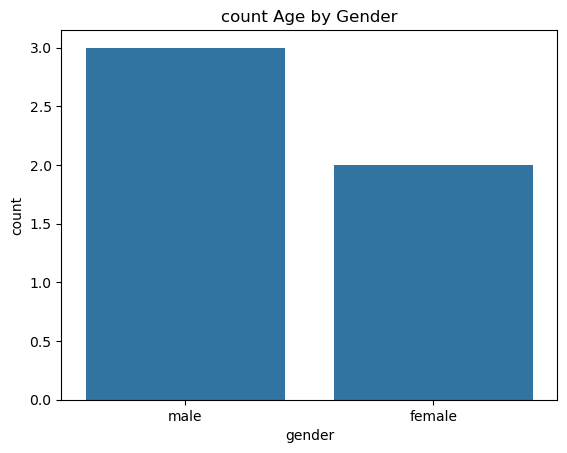

In [109]:
data = {
    "gender": ["male", "female", "male", "female", "male"],
    "age": [23, 21, 35, 29, 40]
}
df = pd.DataFrame(data)
sb.countplot(data=df, x="gender")
plt.title("count Age by Gender")
plt.show()

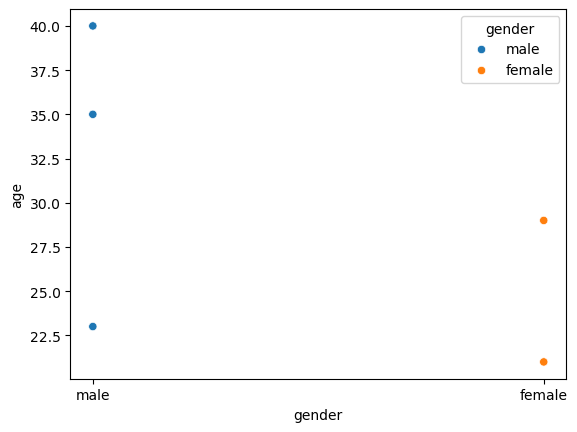

In [110]:
sb.scatterplot(data=data,x='gender',y='age',hue='gender')
plt.show()

<Axes: ylabel='age'>

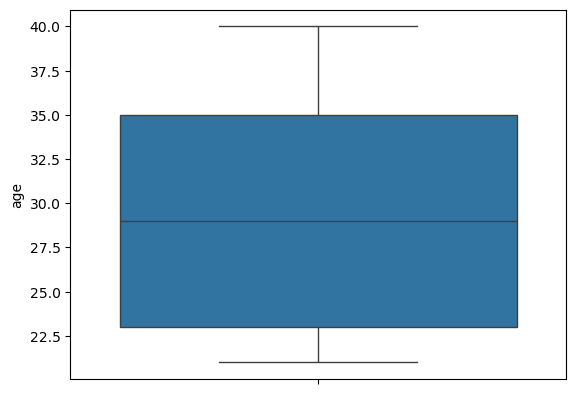

In [111]:
sb.boxplot(df.age)

In [112]:
df=pd.read_csv(r"C:\Users\ROHIT\Downloads\titanic.csv")

In [113]:
df

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


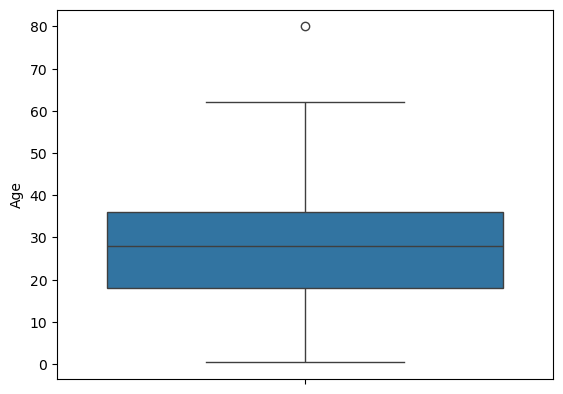

In [114]:
h=df[(df.gender=='male')&(df.Survived==1)]
sb.boxplot(h['Age'])
plt.show()

In [115]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
df.SibSp.head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64

In [117]:
df[(df.gender=='female')&(df.Survived==1)].head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


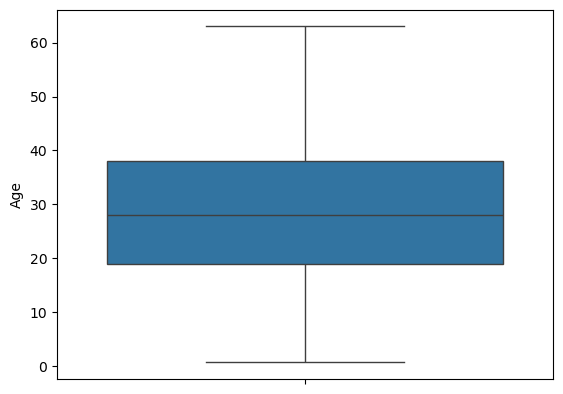

In [118]:
g=df[(df.gender=='female')&(df.Survived==1)]
sb.boxplot(g['Age'])
plt.show()

In [119]:
df[(df.gender=='female')&(df.Survived==0)]['Age'].mean()

np.float64(25.046875)

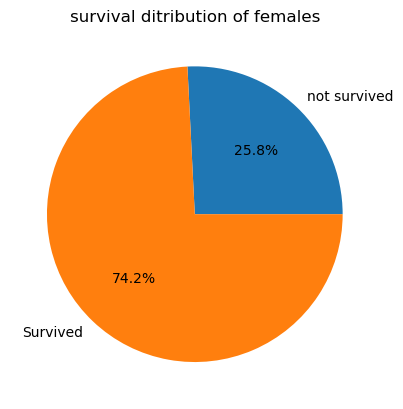

In [120]:
gb=df[df['gender']=='female'].groupby(by='Survived').size()
labels=['not survived','Survived']
plt.pie(gb,labels=labels,autopct='%.1f%%')

plt.title('survival ditribution of females')
plt.show()


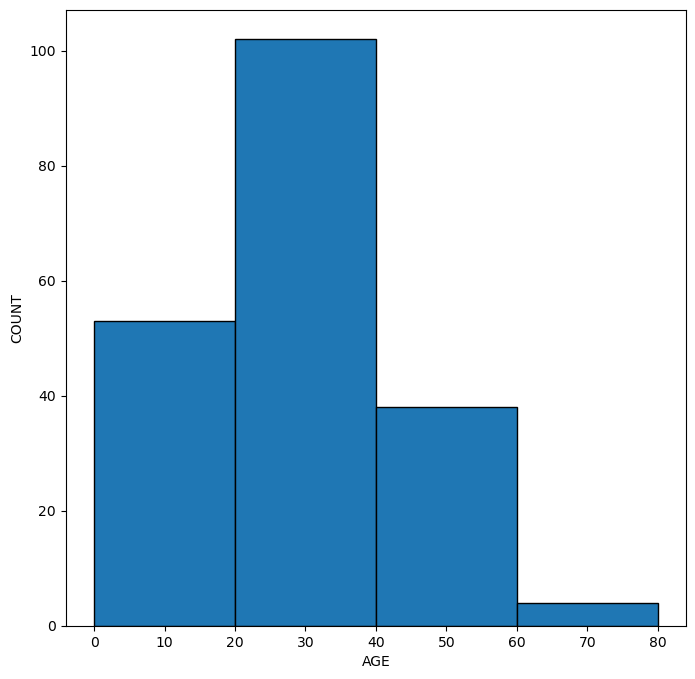

In [121]:
hr=df[(df.gender=='female') &(df.Survived==1)]
plt.figure(figsize=(8,8))
plt.hist(x=hr['Age'],bins=[0,20,40,60,80],edgecolor='k')
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

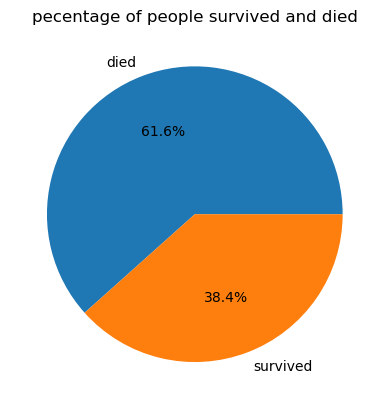

In [122]:
he=df.groupby(by='Survived').size()
label=['died','survived']
plt.pie(he,labels=label,autopct='%.1f%%')
plt.title('pecentage of people survived and died')
plt.show()


In [123]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
df[(df.gender=='female')&(df.Survived==1)].shape

(233, 12)

In [125]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [126]:
df[(df.gender=='male')&(df.Survived==1)&(df.FamilySize==3)].shape

(5, 13)

In [127]:
99+71+38+16+3

227

In [128]:
df

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [132]:
male=df[df['gender']=='male'].Survived
female=df[df['gender']=='female'].Survived
df1=male.sample(20,replace=False)
df2=female.sample(20,replace=False)
alt_hyp='there is significanse reason'
null_hyp='there is no significanse reason'
_,pvalue=stats.ttest_ind(df1,df2)
if pvalue<=.05:
    print(alt_hyp)
else:
    print(null_hyp)

there is significanse reason


In [133]:
ctm=pd.crosstab(df.gender,df.Survived)
ctm

Survived,0,1
gender,,
female,81,233
male,468,109


In [134]:
_,pvalue,_,_=stats.chi2_contingency(ctm)
if pvalue<=.05:
    print('alt_hyp')
else:
    print('null_hyp')

alt_hyp
